In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ai_job_market_insights.csv')
data.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [3]:
selected_features = data[['Industry', 'Company_Size', 'AI_Adoption_Level', 'Required_Skills', 'Salary_USD']]


In [4]:
# Preprocessing pipeline for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Industry', 'Company_Size', 'AI_Adoption_Level', 'Required_Skills']),
        ('num', StandardScaler(), ['Salary_USD'])
    ])

In [5]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))  # Start with 5 clusters as an example
])

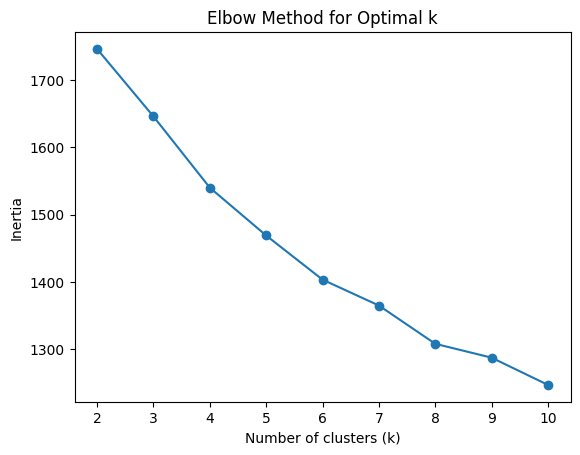

In [9]:
# Range of clusters to try
inertia = []
K_range = range(2, 11)

for k in K_range:
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(selected_features)
    inertia.append(pipeline['kmeans'].inertia_)

# Plot inertia vs. number of clusters
import matplotlib.pyplot as plt
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
# Fit the pipeline with the chosen number of clusters
optimal_k = 4  # Adjust based on your elbow plot findings
pipeline.set_params(kmeans__n_clusters=optimal_k)
pipeline.fit(selected_features)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Industry', 'Company_Size',
                                                   'AI_Adoption_Level',
                                                   'Required_Skills']),
                                                 ('num', StandardScaler(),
                                                  ['Salary_USD'])])),
                ('kmeans', KMeans(n_clusters=4))])

In [11]:
# Assign cluster labels to data
data['Cluster'] = pipeline.predict(selected_features)

# Display sample data from each cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    display(data[data['Cluster'] == i].head())


Cluster 0:


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,Cluster
17,AI Researcher,Manufacturing,Large,Tokyo,Low,High,Project Management,73394.896219,No,Stable,0
19,Software Engineer,Entertainment,Small,Dubai,Low,Low,UX/UI Design,73920.458527,Yes,Growth,0
22,UX Designer,Retail,Small,Tokyo,High,Medium,Cybersecurity,41495.714443,No,Decline,0
30,Operations Manager,Transportation,Medium,Dubai,High,Medium,Project Management,46705.714994,Yes,Stable,0
41,Software Engineer,Transportation,Small,London,Low,Low,UX/UI Design,78250.043701,Yes,Growth,0



Cluster 1:


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,Cluster
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth,1
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth,1
5,UX Designer,Education,Large,San Francisco,Medium,Medium,Cybersecurity,102825.007867,No,Growth,1
14,Product Manager,Finance,Medium,Singapore,High,High,JavaScript,101001.901141,Yes,Growth,1
20,Sales Manager,Retail,Medium,Sydney,Medium,Low,JavaScript,134822.691380,Yes,Decline,1



Cluster 2:


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,Cluster
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline,2
7,Cybersecurity Analyst,Technology,Small,Dubai,Medium,Low,Machine Learning,86607.317618,Yes,Decline,2
8,AI Researcher,Retail,Large,London,High,Low,JavaScript,75015.860846,No,Stable,2
9,Sales Manager,Entertainment,Medium,Singapore,High,Low,Cybersecurity,96834.578295,Yes,Decline,2
10,Marketing Specialist,Finance,Small,London,High,High,Python,91566.973379,Yes,Growth,2



Cluster 3:


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,Cluster
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth,3
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline,3
6,HR Manager,Finance,Medium,Singapore,Low,High,Sales,102065.720673,Yes,Growth,3
13,HR Manager,Retail,Small,Paris,Low,High,Cybersecurity,98209.516878,Yes,Decline,3
24,Operations Manager,Transportation,Medium,San Francisco,Low,Low,UX/UI Design,88539.330404,Yes,Stable,3


In [12]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(pipeline['preprocessor'].transform(selected_features), data['Cluster'])
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')


Silhouette Score for 4 clusters: 0.08333349625167188
